In [1]:
import pandas as pd
import numpy as np

data = pd.read_csv('../Machine_Learning/us_accidents.csv', chunksize=50000)
df = pd.concat(data, ignore_index=True)
df.head()


,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Night,Night,Day
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,...,False,False,False,False,True,False,Night,Night,Day,Day
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,...,False,False,False,False,False,False,Night,Day,Day,Day
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day


In [2]:
# Getting data for Houston and Dallas only
houston = df[(df['City'] == 'Houston') & (df['State'] == 'TX')]
dallas = df[(df['City'] == 'Dallas') & (df['State'] == 'TX')]

In [3]:
# Save both dataframes to a new csv file
houston.to_csv('../Machine_Learning/houston_accident.csv', index=False) 
dallas.to_csv('../Machine_Learning/dallas_accident.csv', index=False) 

In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv('../Machine_Learning/dallas_accident.csv')

df.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-261014,Source2,2,2016-11-30 16:10:04,2016-11-30 17:25:00,32.662193,-96.943153,NaN,NaN,0.01,...,False,False,False,False,True,False,Day,Day,Day,Day
1,A-261015,Source2,3,2016-11-30 16:05:32,2016-11-30 17:24:00,32.778790,-96.782021,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day
2,A-261016,Source2,2,2016-11-30 16:10:46,2016-11-30 17:27:00,32.724277,-96.762245,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
3,A-261017,Source2,2,2016-11-30 15:45:59,2016-11-30 17:18:00,32.708355,-96.700043,NaN,NaN,0.00,...,False,False,False,False,False,False,Day,Day,Day,Day
4,A-261018,Source2,3,2016-11-30 16:06:04,2016-11-30 17:20:42,32.864021,-96.661140,NaN,NaN,0.01,...,False,False,False,False,False,False,Day,Day,Day,Day


In [2]:
# Check if there's any columns that have only one unique value.
one_val = []
unique = dict(df.nunique())

for k, v in unique.items():
   if v <= 1:
      one_val.append(k)

print(f'All features that have only one unique value: {one_val}')

All features that have only one unique value: ['City', 'State', 'Country', 'Timezone', 'Roundabout', 'Turning_Loop']


In [3]:
# Delete features with only one unique value.
df.drop(one_val, axis=1, inplace=True)

In [4]:
# Check if there's features that's missing more than 50% of data.
missing = dict(df.isna().mean().round(5) * 100.0)
miss_50 = []
for k, v in missing.items():
   if v > 50:
      miss_50.append(k)

print(f'All features that\'s missing more than 50%: {miss_50}')

All features that's missing more than 50%: ['End_Lat', 'End_Lng']


In [5]:
# Delete values that's missing more than 50% data
df.drop(miss_50, axis=1, inplace=True)

In [6]:
# Look at other features that's missing in data
df.isna().mean().round(5) * 100.0

ID                        0.000
Source                    0.000
Severity                  0.000
Start_Time                0.000
End_Time                  0.000
Start_Lat                 0.000
Start_Lng                 0.000
Distance(mi)              0.000
Description               0.000
Street                    0.131
County                    0.000
Zipcode                   0.000
Airport_Code              0.015
Weather_Timestamp         0.105
Temperature(F)            0.223
Wind_Chill(F)            31.992
Humidity(%)               0.230
Pressure(in)              0.144
Visibility(mi)            0.241
Wind_Direction            0.373
Wind_Speed(mph)           2.955
Precipitation(in)        31.992
Weather_Condition         0.361
Amenity                   0.000
Bump                      0.000
Crossing                  0.000
Give_Way                  0.000
Junction                  0.000
No_Exit                   0.000
Railway                   0.000
Station                   0.000
Stop    

In [7]:
# Check sparsity of Precipitation feature
df['Precipitation(in)'].value_counts()

0.00    81568
0.01     1843
0.02      887
0.03      569
0.05      423
        ...  
0.89        1
1.58        1
1.60        1
2.05        1
2.10        1
Name: Precipitation(in), Length: 114, dtype: int64

In [8]:
'''
   Based on above, Wind_Chill(F) and Precipitation(in) have around 32 percent missing data. This is due
   to the fact that the missing data is dependent on whether these two are calculable or not depending on
   certain conditions. For example, Wind_Chill(F) is only calculated when the temperature is less than 50
   degrees Farenheit. Precipitation is different, since the dataset came from 3 different sources, they have
   different parameters for rainfall. Some sources keep the values nan (or null) when they is no rain, and other
   sources keep the values at 0. This concludes that both features needs to be deleted since they are MNAR On
   top of this, the precipitation feature has sparse data.
'''

delete = ['Wind_Chill(F)', 'Precipitation(in)']
df.drop(delete, axis=1, inplace=True)


In [9]:
'''
   Datetime issues needs to be fixed before splitting into categorical or numerical since they 
   can theoretically be both. Difference Start_Time and End_Time since the difference in the two
   indicates the time that the accident occurred flow of traffic.
'''

df['Accident_Duration'] = pd.to_datetime(df['End_Time']) - pd.to_datetime(df['Start_Time'])
df['Accident_Duration'] = df['Accident_Duration'].apply(lambda x: round((x.total_seconds() / 60), 3))

# Drop Start Time and End Times
delete = ['Start_Time', 'End_Time']
df.drop(delete, axis=1, inplace=True)

In [10]:
# Drop any miscellaneuous
# Description can potentially be used for NLP data
df.drop(['Description', 'ID'], axis=1, inplace=True)

In [11]:
# Check for any duplicate data
dups = df.duplicated()

# Print any duplicates
print(f'Print True if there\'s duplicates: {dups.any()}')

# List number of duplicates
print(f'{len(df[dups])} duplicates')

Print True if there's duplicates: True
1151 duplicates


In [12]:
# Print shape before
print(f'Shape before: {df.shape}')

# Drop duplicates
df.drop_duplicates(inplace=True)

# Print shape after
print(f'Shape after: {df.shape}') 

Shape before: (130303, 33)
Shape after: (129152, 33)


In [13]:
'''
   Since data came from three sources, we have to 
   make sure there isn't any heterogeneous data.
'''

source1 = df[df['Source']=='Source1']
source2 = df[df['Source']=='Source2']
source3 = df[df['Source']=='Source3']

In [14]:
# Print length of three sources
print(f'Length of data in source 1: {len(source1)}')
print(f'Length of data in source 2: {len(source2)}')
print(f'Length of data in source 3: {len(source3)}')

Length of data in source 1: 57871
Length of data in source 2: 70137
Length of data in source 3: 1144


In [15]:
# Print number of output values of source 1
print('Source 1:')
print(source1['Severity'].value_counts())

Source 1:
2    51508
3     5382
4      979
1        2
Name: Severity, dtype: int64


In [16]:
# Print number of output values of source 2
print('Source 2:')
print(source2['Severity'].value_counts())

Source 2:
2    42089
3    27089
1      841
4      118
Name: Severity, dtype: int64


In [17]:
print('Source 3:')
print(source3['Severity'].value_counts())

Source 3:
2    521
3    473
1    150
Name: Severity, dtype: int64


<Axes: title={'center': 'Source 3'}, xlabel='Severity', ylabel='Accident_Duration'>

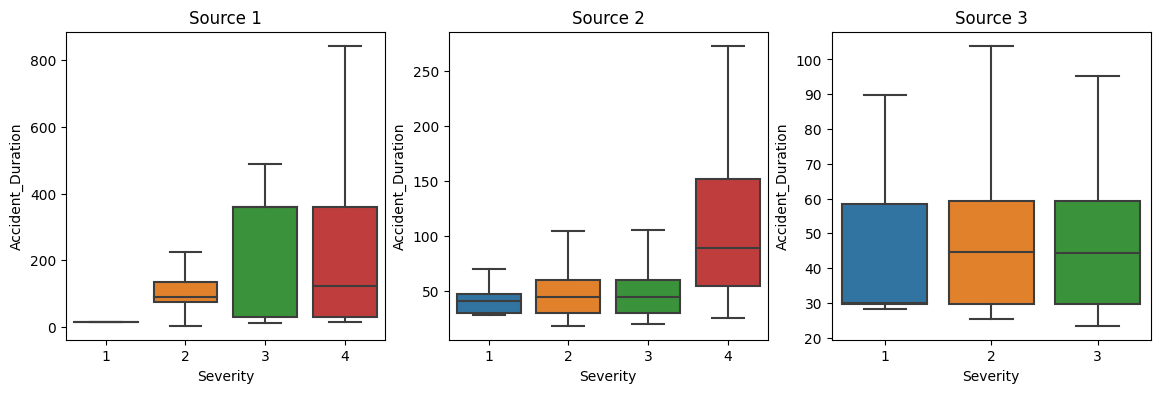

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt 

# Note that outliers aren't shown and are dealt with later.

# Side-by-side boxplot for source 1
fig, axis = plt.subplots(nrows=1, ncols=3, figsize=(14,4))
combined1 = pd.concat([source1['Accident_Duration'], source1['Severity']], axis=1)
axis[0].set_title('Source 1')
sns.boxplot(x='Severity',
            y='Accident_Duration',
            data=combined1,
            ax=axis[0],
            showfliers=False)

# Side-by-side boxplot for source 2
combined2 = pd.concat([source2['Accident_Duration'], source2['Severity']], axis=1)
axis[1].set_title('Source 2')
sns.boxplot(x='Severity',
            y='Accident_Duration',
            data=combined2,
            ax=axis[1],
            showfliers=False)

# Side-by-side boxplot for source 3
combined3 = pd.concat([source3['Accident_Duration'], source3['Severity']], axis=1)
axis[2].set_title('Source 3')
sns.boxplot(x='Severity',
            y='Accident_Duration',
            data=combined3,
            ax=axis[2],
            showfliers=False)

In [19]:
'''  
   Based on boxplots above, it seems that source 2 has a big discrepency of accident duration
   times between severity level 4 and every other severity level. Because of this, it becomes
   a binary classifiation problem where we measure whether an ML model could predict whether an
   accident is severe or not. Source 1 only has two rows of data for level 1 severity and there isn't
   a big enough discrepency between levels 3 and 4. Source 3 doesn't even have level 4 severity, and there
   isn't much discrepency between any of the severity levels.
'''

# Only use data from source 2 and delete source column since it's all from same source.
df = source2.copy()
df.drop(['Source'],axis=1, inplace=True)

# Convert severity level 1, 2, and 3 into severity level 0 and severity level 4 into 1
replacement = {1:0, 2:0, 3:0, 4:1}
df['Severity'] = df['Severity'].replace(replacement)

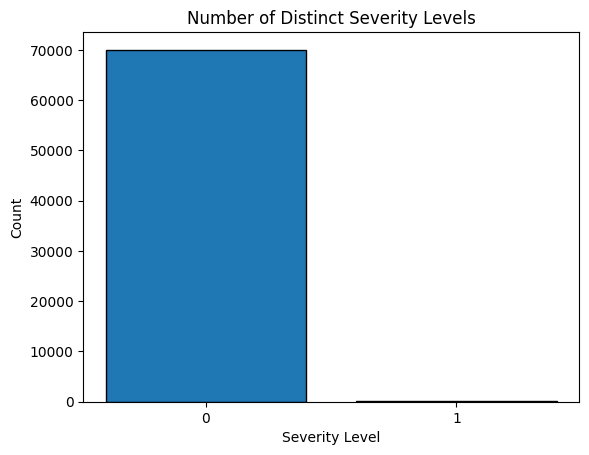

In [22]:
from collections import Counter

out_dict = Counter(sorted(df['Severity'].astype('str')))

plt.bar(out_dict.keys(), out_dict.values(), edgecolor='black')
plt.title(label='Number of Distinct Severity Levels')
plt.xlabel('Severity Level')
plt.ylabel('Count')
plt.show()

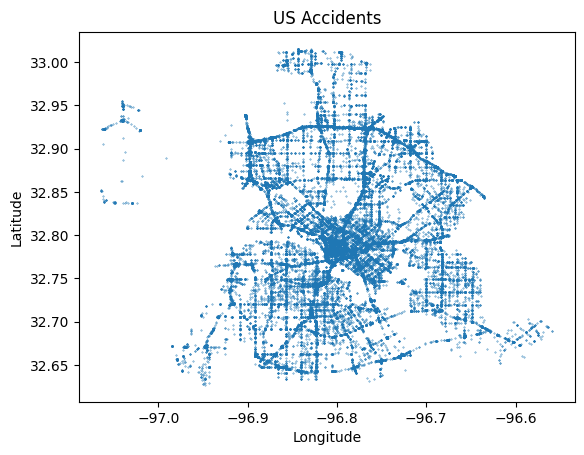

In [23]:
# Show US Accidents as scatter plot
plt.scatter(df['Start_Lng'], df['Start_Lat'], s=0.1)
plt.title('US Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [24]:
'''
  Based on above, there seems to be some accidents that's not in vincinity.
  Unique values of the County feature will be looked at.
'''

print('County unique values:')
print(df['County'].value_counts())

County unique values:
Dallas     68831
Collin       816
Denton       286
Tarrant      204
Name: County, dtype: int64


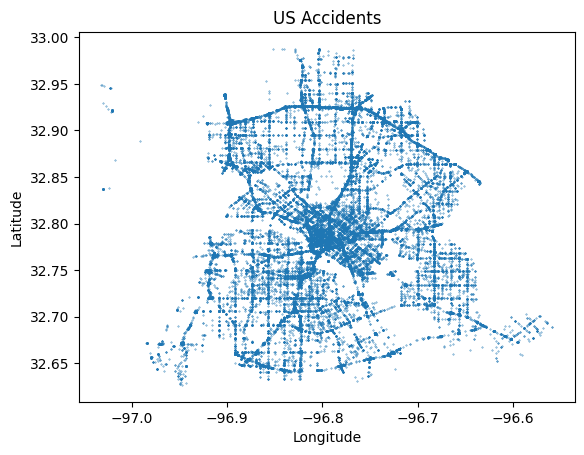

In [25]:
# Only use Dallas county since it has the most values
dallas = df[df['County'] == 'Dallas']

plt.scatter(dallas['Start_Lng'], dallas['Start_Lat'], s=0.1)
plt.title('US Accidents')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

In [26]:
'''  
  Based on scatterplot above, there's still some outlliers with Latitude and Longitude.
  However, most of them are gone. We can just use Dallas county and get rid of county feature.
'''

df = dallas.copy()
df.drop(['County'], axis=1, inplace=True)

In [27]:
# Sepearate longitude and latitude to make separate scatter plots
tame_lng = df[df['Severity'] == 0]['Start_Lng']
tame_lat = df[df['Severity'] == 0]['Start_Lat']
severe_lng = df[df['Severity'] == 1]['Start_Lng']
severe_lat = df[df['Severity'] == 1]['Start_Lat']

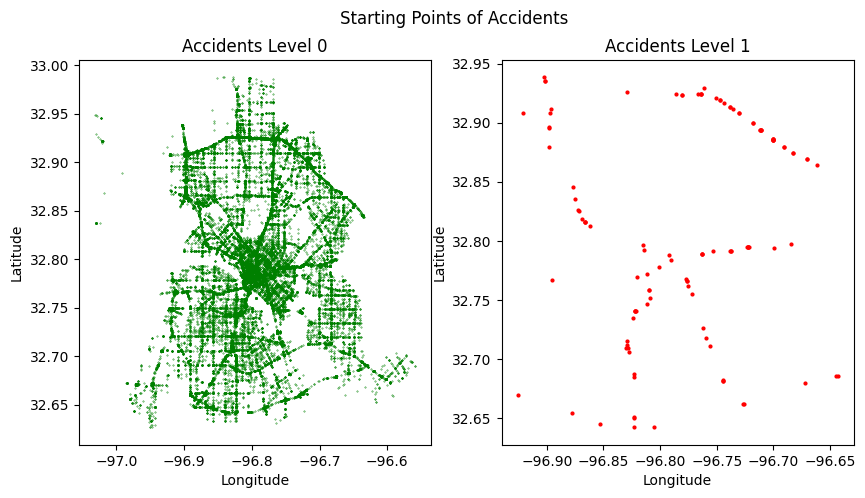

In [28]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10,5))
ax[0].scatter(tame_lng, tame_lat, s=0.1, c='green')
ax[0].set_title('Accidents Level 0')
ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')

ax[1].scatter(severe_lng, severe_lat, s=4, c='red')
ax[1].set_title('Accidents Level 1')
ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')

plt.suptitle('Starting Points of Accidents')
plt.show()

In [29]:
# Separate the numerical and categorical features as well as output
num = df.select_dtypes(include=['int64', 'float64']).copy()
num = num.drop(['Severity'], axis=1, inplace=False)
output = df['Severity'].copy()
cat = df.select_dtypes(include=['object', 'bool']).copy()

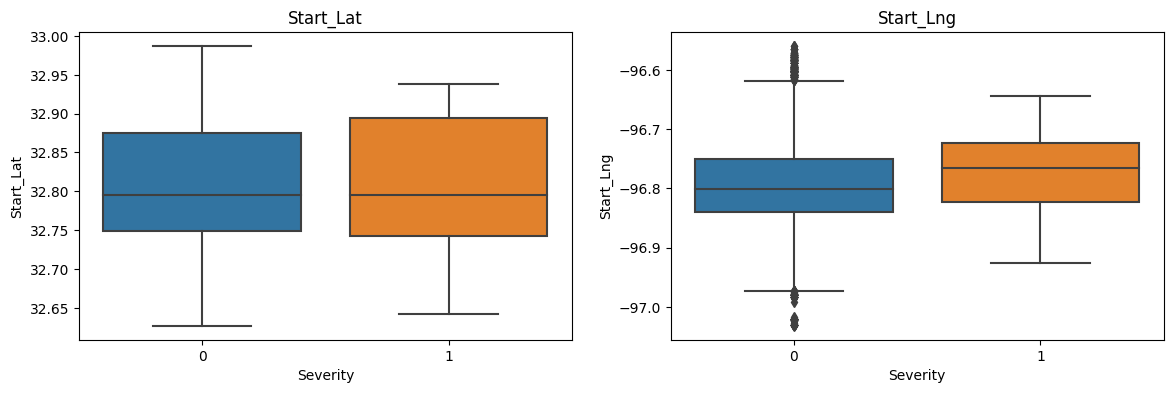

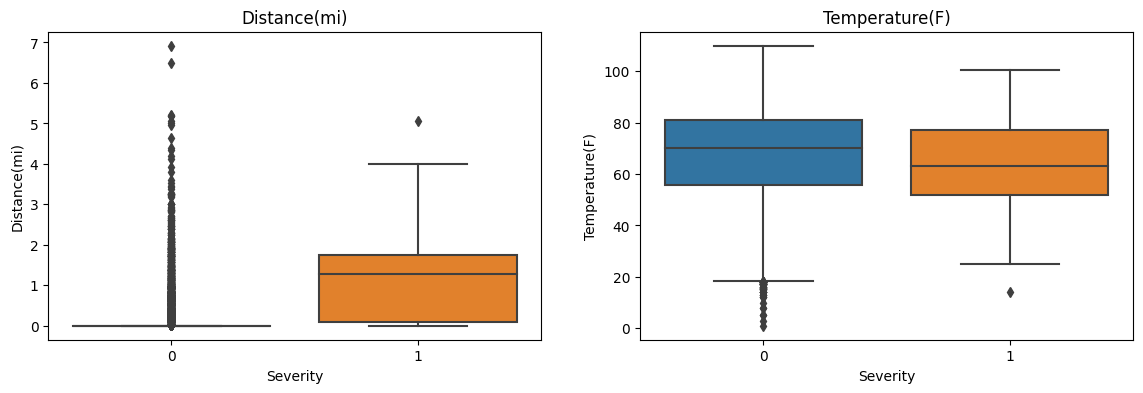

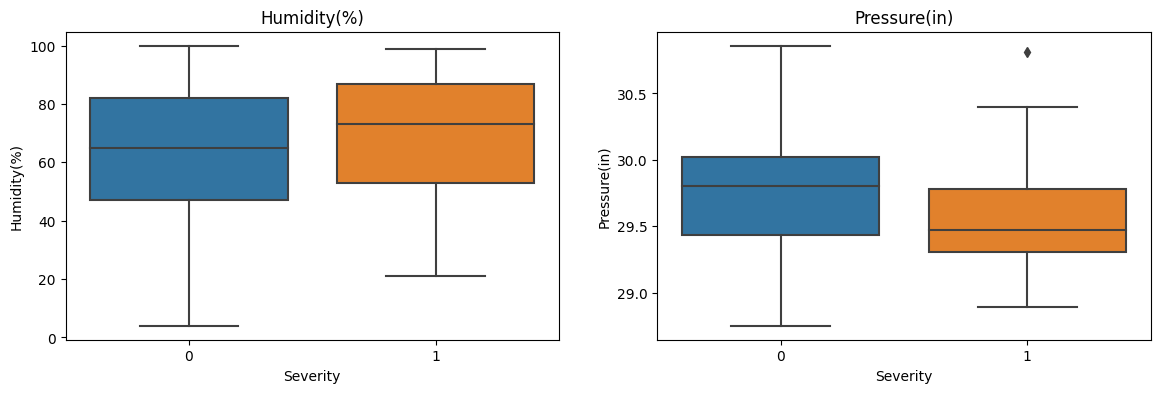

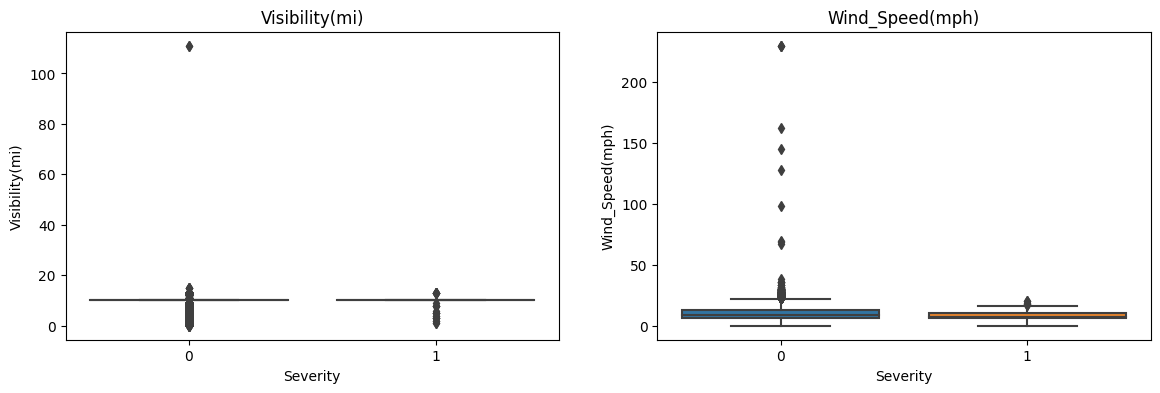

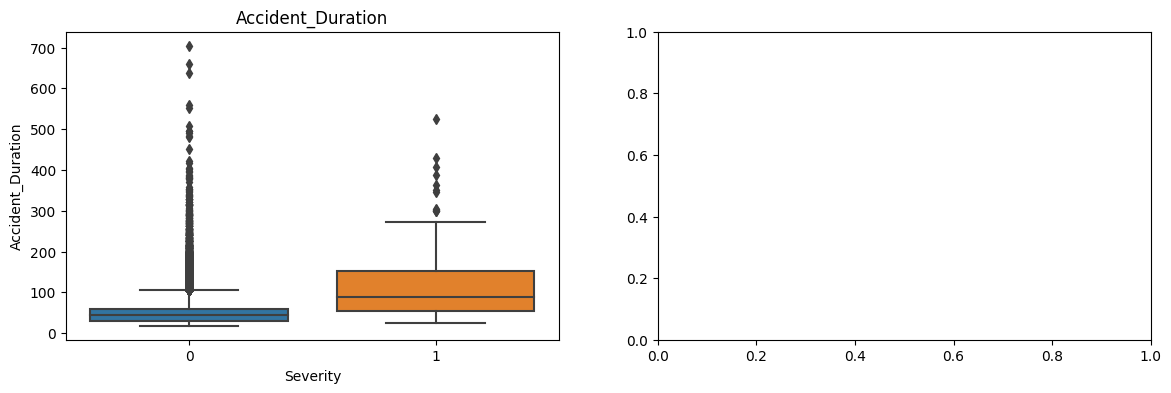

In [30]:
ROW, COLS = num.shape
col_names = num.columns

# Prints numerical data boxplots with no outliers
for i in range(0, COLS, 2):
   fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
   combined1 = pd.concat([num.iloc[:,i],output], axis=1)
   axis[0].set_title(col_names[i])
   sns.boxplot(x='Severity',
               y=col_names[i],
               data=combined1,
               ax=axis[0],
               showfliers=True)

   if i+1 < COLS:
      combined2 = pd.concat([num.iloc[:,i+1],output], axis=1)
      axis[1].set_title(col_names[i+1])
      sns.boxplot(x='Severity',
                  y=col_names[i+1],
                  data=combined2,
                  ax=axis[1],
                  showfliers=True)

   

In [31]:
# Since Visibility has mostly sparse data, delete them
delete = ['Distance(mi)', 'Visibility(mi)']
df.drop(delete, axis=1, inplace=True)
num.drop(delete, axis=1, inplace=True)

In [32]:
# Identify all outliers for numerical features
for i in range(len(num.columns)):
   data = num.iloc[:,i]
   q_25, q_75 = np.nanpercentile(data, 25), np.nanpercentile(data, 75)
   IQR = q_75 - q_25
   cut_off = 1.5 * IQR
   lower, upper = q_25 - cut_off, q_75 + cut_off

   outliers_index = []
   for j in data.index:
      if data[j] < lower or data[j] > upper:
         outliers_index.append(j)

   # Get rid of all outliers for numeric features
   df.drop(outliers_index, inplace=True)
   num.drop(outliers_index, inplace=True)
   cat.drop(outliers_index, inplace=True)


In [33]:
# Reset Indices
df.reset_index(drop=True)
num.reset_index(drop=True)
cat.reset_index(drop=True)

print(f'Indices are reset')

Indices are reset


In [34]:
# Check again for any duplicate data
dups = df.duplicated()

# Print any duplicates
print(f'Print True if there\'s duplicates: {dups.any()}')

# List number of duplicates
print(f'{len(df[dups])} duplicates')

Print True if there's duplicates: True
3 duplicates


In [35]:
# Drop duplicates once again
df.drop_duplicates(inplace=True)

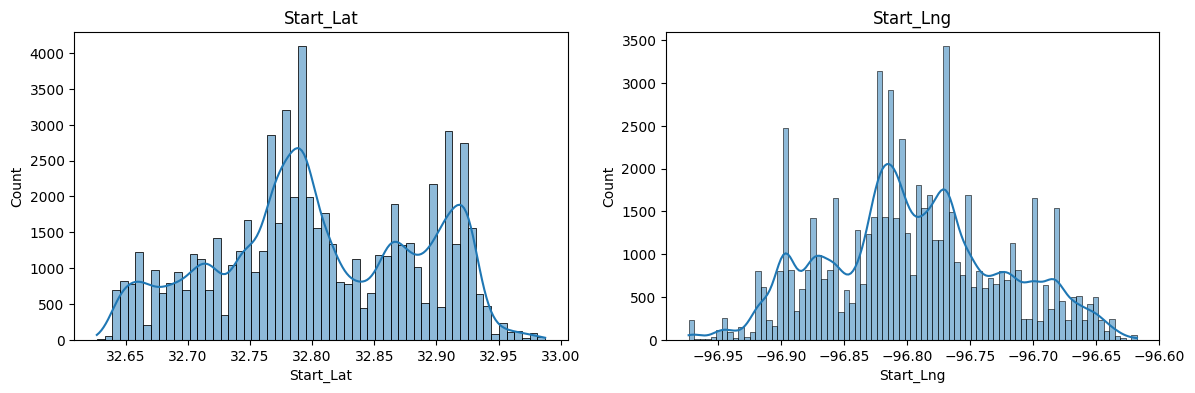

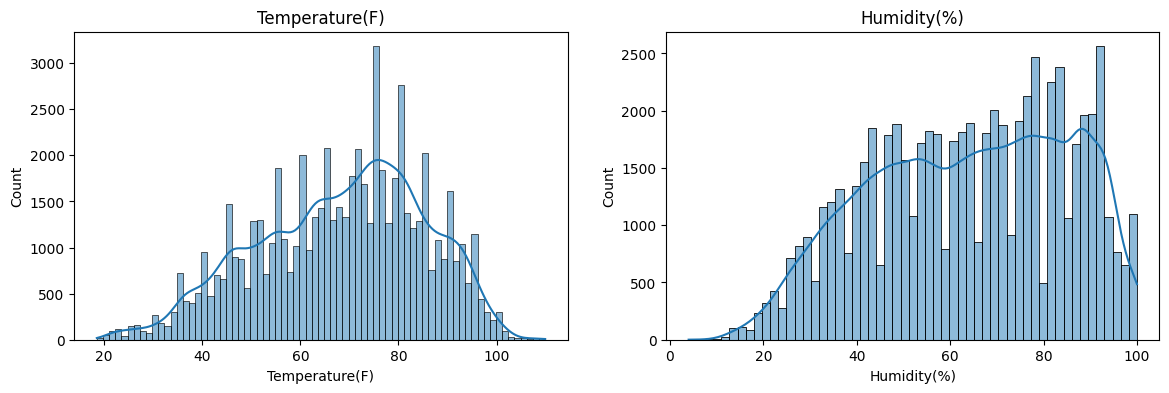

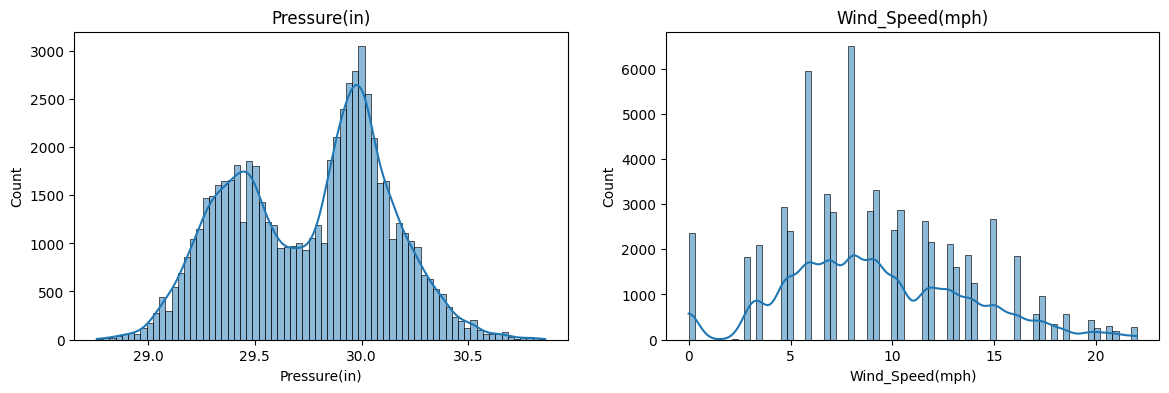

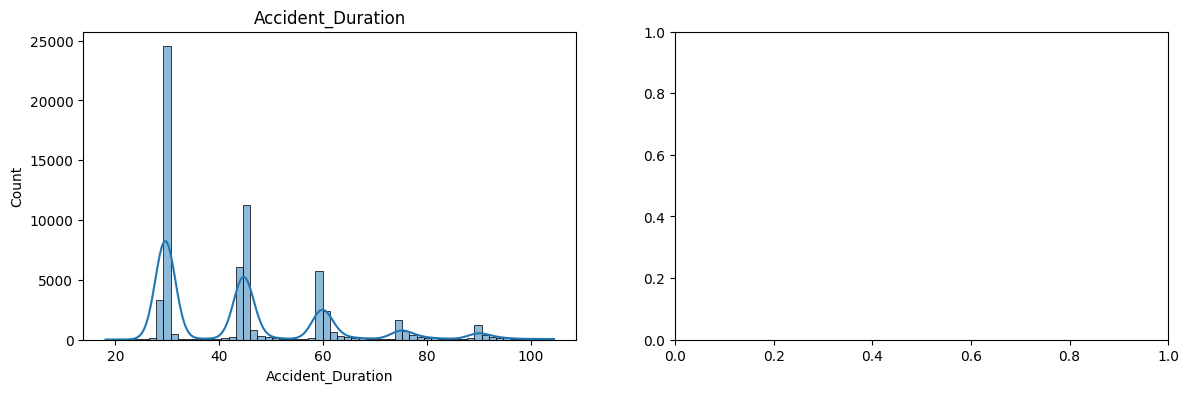

In [36]:
import seaborn as sns

ROW, COLS = num.shape
col_names = num.columns

# Chekcks histogram to see if transformations made it more gaussian
# Standardization on the data is made too to make variance more equal
for i in range(0, COLS, 2):
   fig, axis = plt.subplots(nrows=1, ncols=2, figsize=(14,4))
   axis[0].set_title(col_names[i])
   sns.histplot(data=num.iloc[:,i], ax=axis[0], kde=True)

   if i+1 < COLS:
      axis[1].set_title(col_names[i+1])
      sns.histplot(data=num.iloc[:,i+1], ax=axis[1], kde=True)
 

Text(0.5, 1.0, 'Confusion Matrix (Kendall)')

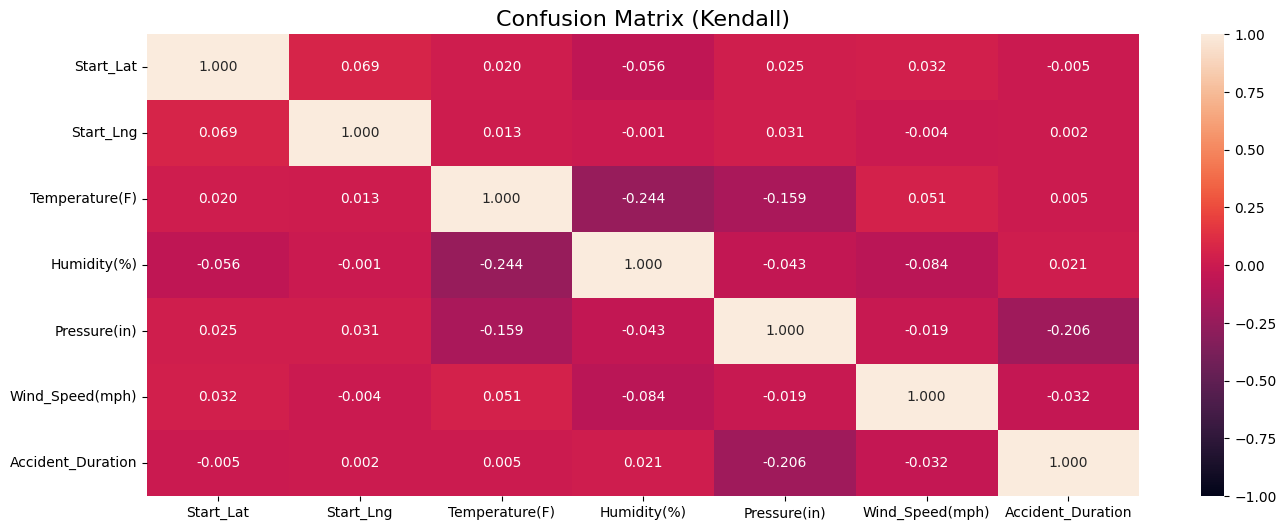

In [38]:
# Find correlation based on (unparametric) Kendall's test
s_test = num.corr('kendall')
plt.figure(figsize=(16, 6))
cm = sns.heatmap(s_test, vmin=-1, vmax=1, annot=True, fmt='.3f')
cm.set_title('Confusion Matrix (Kendall)', fontdict={'fontsize':16})

In [ ]:
# Look at number of unique values per each feature
cat.nunique()

Street                    2806
Zipcode                   4907
Airport_Code                 5
Weather_Timestamp        35574
Wind_Direction              24
Weather_Condition           56
Amenity                      2
Bump                         2
Crossing                     2
Give_Way                     2
Junction                     2
No_Exit                      2
Railway                      2
Station                      2
Stop                         2
Traffic_Calming              2
Traffic_Signal               2
Sunrise_Sunset               2
Civil_Twilight               2
Nautical_Twilight            2
Astronomical_Twilight        2
dtype: int64

In [ ]:
'''
   Looking at data Weather_Timestamp doesn't seem to add value since it's
   only the time-stamp of when the weather was recorded
'''
cat.drop(['Weather_Timestamp'], axis=1, inplace=True)
df.drop(['Weather_Timestamp'], axis=1, inplace=True)

In [ ]:
import re
from collections import Counter

highway_parts = r'\b\w*(I-|TX-|US-|Hwy|Highway|highway|State_Hwy|Fwy|Freeway|Expy|Expressway|Route|Loop|Spur)\w*\b'
common_roads = r'\b\w*(local_roads|Ave|St|Dr|Rd|Blvd|Pkwy|Trl|Ln|Pl|Ter|Ct|Cir|Way)\w*\b'
tolls = r'\b\w*(paid_highway|pikes|Tollway|Toll|Tpke|Pike|Tlwy)\w*\b' 

# Group street names together to reduce cardinality
for i, w in enumerate(df['Street']):
   if pd.isna(w):
      continue
   if re.search(highway_parts, w):
      cat.iloc[i, 0] = 'highway'
      df.iloc[i, 3] = 'highway'
   elif re.search(common_roads, w):
      cat.iloc[i, 0] = 'local_roads'
      df.iloc[i, 3] = 'local_roads'
   elif re.search(tolls, w):
      cat.iloc[i, 0] = 'paid_highway'
      df.iloc[i, 3] = 'paid_highway'
   else:
      cat.iloc[i, 0] = 'other'
      df.iloc[i, 3] = 'other'

# Print numbers of each unique street that was grouped     
print(f'Numbers of Each Unique Street:\n {len(Counter(df.Street))}')

Numbers of Each Unique Street:
 5


In [ ]:
# Group zipcode by 5 digit number to reduce cardinality
df_zipcode = df['Zipcode']
cat_zipcode = cat['Zipcode']
for i, z in enumerate(df['Zipcode']):
   df_zipcode.iloc[i] = z[:5]
   cat_zipcode.iloc[i] = z[:5]
print(f'Number of unique zipcodes: {len(Counter(df_zipcode))}')

/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/613334027.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zipcode.iloc[i] = z[:5]
/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/613334027.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_zipcode.iloc[i] = z[:5]


Number of unique zipcodes: 51


In [ ]:
# Get all unique wind directions
df['Wind_Direction'].unique()

array(['Variable', 'NNW', 'WNW', 'North', 'Calm', 'NNE', 'NW', 'South',
       'SSE', 'SE', 'ESE', 'ENE', 'East', 'NE', 'SW', 'SSW', 'West',
       'WSW', nan, 'E', 'VAR', 'CALM', 'S', 'W', 'N'], dtype=object)

In [ ]:
directions = {'North':'N','N':'N',
              'South':'S','S':'S',
              'East':'E', 'E':'E',
              'West':'W', 'W':'W',
              'SW':'SW', 'SE':'SE',
              'NNE':'NE', 'NE':'NE',
              'ENE':'NE', 'NNW':'NW', 
              'WNW':'NW', 'SSE':'SE', 
              'ESE':'SE', 'SSW':'SW',
              'WSW':'SW', 'NW':'NW',
              'CALM':'Calm', 'Calm':'Calm'}

df_wind = df['Wind_Direction']
cat_wind = cat['Wind_Direction']

# Reduce Cardinality of wind directions
for i, w in enumerate(df_wind):
   if w in directions:
      cat_wind.iloc[i] = directions[w]
      df_wind.iloc[i] = directions[w]
   else:
      cat_wind.iloc[i] = np.nan
      df_wind.iloc[i] = np.nan

# Print number of unique values
print(f'Number of unique values: {len(Counter(df_wind))}')

/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/235030546.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_wind.iloc[i] = np.nan
/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/235030546.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_wind.iloc[i] = np.nan
/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/235030546.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_

Number of unique values: 10


In [ ]:
# Look at all Weather Conditions
print(f'Weather Conditions:\n {Counter(df.Weather_Condition)}')

Weather Conditions:
 Counter({'Fair': 12356, 'Mostly Cloudy': 11208, 'Clear': 9706, 'Partly Cloudy': 8214, 'Overcast': 6501, 'Cloudy': 5250, 'Scattered Clouds': 3875, 'Light Rain': 2774, 'Rain': 817, 'Light Drizzle': 587, 'Fog': 431, 'Haze': 375, nan: 302, 'Heavy Rain': 242, 'Light Thunderstorms and Rain': 231, 'Light Rain with Thunder': 175, 'T-Storm': 170, 'Heavy T-Storm': 130, 'Thunderstorm': 128, 'Thunderstorms and Rain': 109, 'Fair / Windy': 100, 'Heavy Thunderstorms and Rain': 91, 'Drizzle': 89, 'Thunder': 80, 'Cloudy / Windy': 56, 'Mostly Cloudy / Windy': 55, 'Thunder in the Vicinity': 48, 'Wintry Mix': 45, 'Light Snow': 41, 'Partly Cloudy / Windy': 29, 'Mist': 23, 'Light Rain / Windy': 20, 'Light Freezing Rain': 16, 'Light Freezing Drizzle': 15, 'Snow': 9, 'Blowing Dust': 8, 'Showers in the Vicinity': 7, 'T-Storm / Windy': 5, 'N/A Precipitation': 5, 'Widespread Dust': 5, 'Rain / Windy': 5, 'Shallow Fog': 5, 'Heavy Drizzle': 4, 'Patches of Fog': 3, 'Light Snow and Sleet': 3, 'Sl

In [ ]:
clear = r'\b(Fair|Clear)\b'
ice = r'\b\w*(Snow|Sleet|Hail|Wintry)\w*\b'
fog = r'\b(Fog|Mist|Haze|Dust)\b'
thunder = r'\b\w*(Thunder|T-Storm)\w*\b'
rain = r'\b(Rain|Drizzle|Shower)\b'
windy = r'\b(Windy)\b'
cloudy = r'\b\w*(Cloud|Overcast)\w*\b'

weather_df = df['Weather_Condition']
weather_cat = cat['Weather_Condition']

# Reduce cardinality of weather
for i, w in enumerate(weather_df):
   if pd.isna(w):
      continue
   elif re.search(clear, w):
      weather_df.iloc[i] = 'Clear'
      weather_cat.iloc[i] = 'Clear'
   elif re.search(ice, w):
      weather_df.iloc[i] = 'Ice'
      weather_cat.iloc[i] = 'Ice'
   elif re.search(fog, w):
      weather_df.iloc[i] = 'Fog'
      weather_cat.iloc[i] = 'Fog'
   elif re.search(thunder, w):
      weather_df.iloc[i] = 'Thunder'
      weather_cat.iloc[i] = 'Thunder'
   elif re.search(rain, w):
      weather_df.iloc[i] = 'Rain'
      weather_cat.iloc[i] = 'Rain'
   elif re.search(windy, w):
      weather_df.iloc[i] = 'Windy'
      weather_cat.iloc[i] = 'Windy'
   elif re.search(cloudy, w):
      weather_df.iloc[i] = 'Cloudy'
      weather_cat.iloc[i] = 'Cloudy'
   else:
      weather_df.iloc[i] = np.nan
      weather_cat.iloc[i] = np.nan

/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/829814980.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_df.iloc[i] = 'Clear'
/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/829814980.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  weather_cat.iloc[i] = 'Clear'
/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_58182/829814980.py:35: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-cop

Amount of Unique Weather Conditions: 17


In [ ]:
# Print Amonut of Unique Weather Conditions
print(f'Amount of Unique Weather Conditions: {len(Counter(weather_cat))}')

Amount of Unique Weather Conditions: 17


In [ ]:
cat_selection = cat.copy()
min_dimen = []

# Find number of unique values for each feature
for c in cat.columns:
   min_dimen.append(cat_selection[c].nunique())

print(f'Number of unique values for V Cramer\'s: \n{min_dimen}')

Number of unique values for V Cramer's: 
[25, 52, 5, 10, 16, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]


In [ ]:
# Turn all binary features to true and false in cat dataframe
cat_selection.loc[:, 'Amenity':'Traffic_Signal'] = cat_selection.loc[:, 'Amenity':'Traffic_Signal'].replace([True, False], [1, 0])
cat_selection.loc[:, 'Sunrise_Sunset':] = cat_selection.loc[:, 'Sunrise_Sunset':].replace(['Day', 'Night'], [1, 0])

/var/folders/4x/0lp0fbb50tzb8407djzd_jgh0000gn/T/ipykernel_42682/3020783535.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  cat_selection.loc[:, 'Sunrise_Sunset':] = cat_selection.loc[:, 'Sunrise_Sunset':].replace(['Day', 'Night'], [1, 0])


In [21]:
# Check to make sure binary features are properly encoded
cat_selection.head()

NameError: name 'cat_selection' is not defined

In [ ]:
from sklearn.preprocessing import LabelEncoder 

le = LabelEncoder()

# Label encode everything to find V Cramer's
for i, c in enumerate(cat_selection.columns[:6]):
   cat_selection[c] = le.fit_transform(cat_selection.iloc[:, i])

In [45]:
# Turn label encoding into objects
cat_selection = pd.concat([df['Severity'], cat_selection], axis=1)
features_cat = cat_selection.astype('str')

In [46]:
from scipy.stats import chi2_contingency

# V Cramer's function
def v_cramers(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * min_dim))

# Find V Cramer's for every categorical column
c_matrix = []
for c1 in cat_selection.columns:
    rows = []
    for c2 in cat_selection.columns:
        contingency_table = pd.crosstab(features_cat[c1], features_cat[c2])
        chi2, p, _, __ = chi2_contingency(contingency_table)
        n = contingency_table.sum().sum()  # Total number of observations
        min_dim = min(contingency_table.shape) - 1  # df = min(rows, columns) - 1
        v_cramer = v_cramers(chi2, n, min_dim) # Find V Cramer
        rows.append(v_cramer)

    c_matrix.append(list(rows))

Text(0.5, 1.0, 'Confusion Matrix (Chi Squared)')

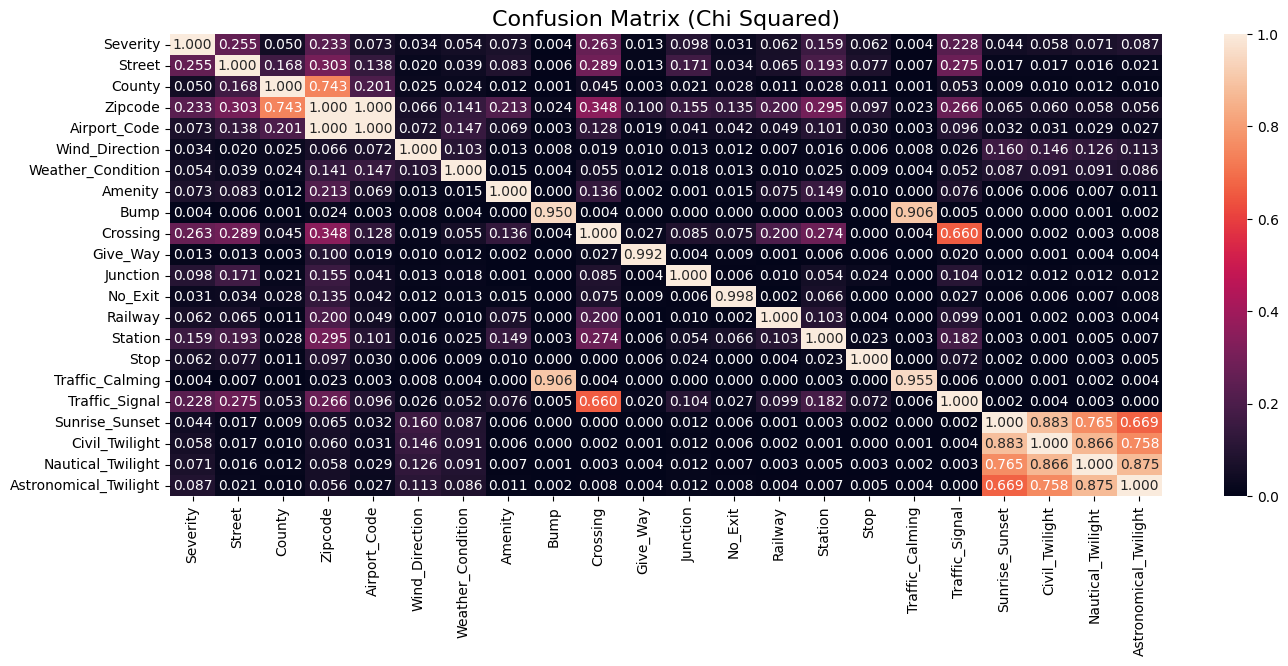

In [47]:
# Plot Confusion Matrix for Chi Squared
plt.figure(figsize=(16, 6))
cm = sns.heatmap(c_matrix,
                 vmin=0,
                 vmax=1, 
                 annot=True, 
                 fmt='.3f',
                 xticklabels=features_cat.columns,
                 yticklabels=features_cat.columns)
cm.set_title('Confusion Matrix (Chi Squared)', fontdict={'fontsize':16})

In [48]:
from sklearn.metrics.cluster import normalized_mutual_info_score 

# Find Mutual Information
mutual_info = []
for c1 in cat_selection.columns:
   row = []
   for c2 in cat_selection.columns:
      score = normalized_mutual_info_score(cat_selection[c1], cat_selection[c2])
      row.append(round(score, 6))
   mutual_info.append(list(row))

Text(0.5, 1.0, 'Confusion Matrix (Chi Squared)')

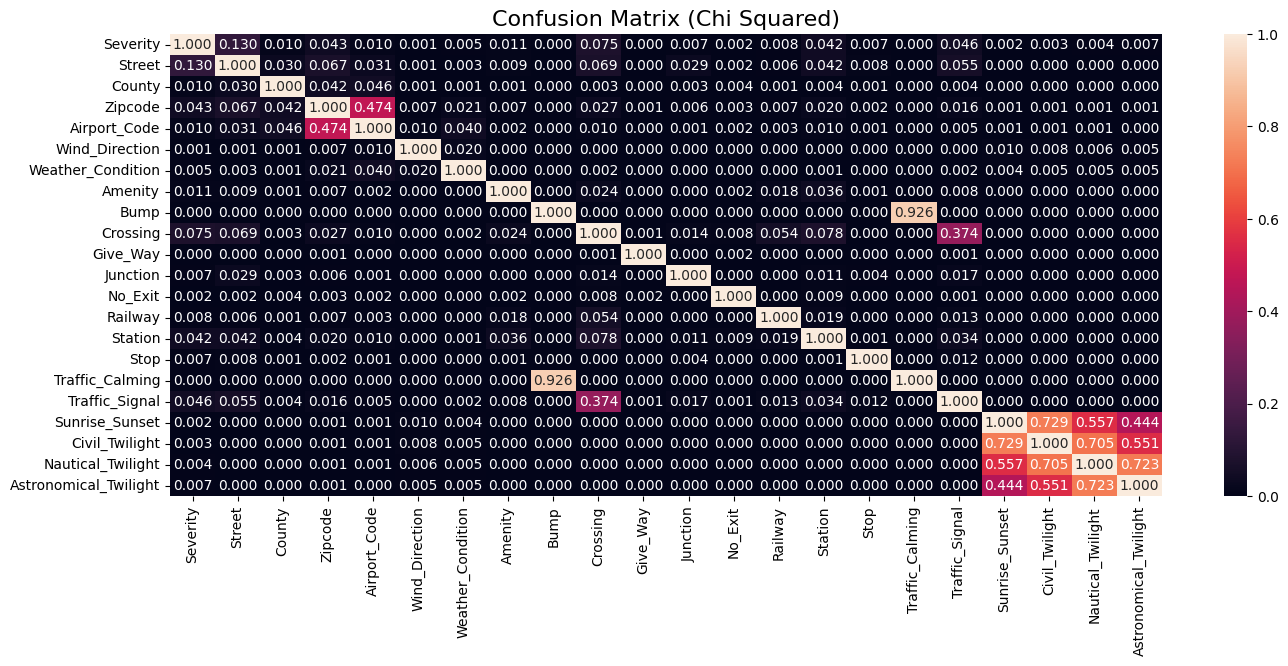

In [49]:
plt.figure(figsize=(16, 6))
cm = sns.heatmap(mutual_info,
                 vmin=0,
                 vmax=1, 
                 annot=True, 
                 fmt='.3f',
                 xticklabels=features_cat.columns,
                 yticklabels=features_cat.columns)
cm.set_title('Confusion Matrix (Mutual Inforamtion)', fontdict={'fontsize':16})

In [51]:
# Delete all multicollinearity features
delete = ['Airport_Code', 'Traffic_Calming', 'Sunrise_Sunset',
          'Civil_Twilight', 'Nautical_Twilight', 'Traffic_Signal']
df.drop(delete, axis=1, inplace=True)

In [ ]:
# Save new dataframe
df.to_csv('../Machine_Learning/updated.csv', index=False) 